# DeepAR metrics
Model: DeepAR

Dataset: electricity, exchange rate, solar_nips, traffic_nips

In this notebook we investigate the difference in evaulation scores when the same model is trained and tested multiple times with the same settings but different random seeds. We also explore if the best and worst seeds are consistently good or bad across all timeseries.

In [1]:
import matplotlib.pyplot as plt

from src.metrics import *

In [2]:
metric = ["MAPE"]
n = 10

### Exchange rate

In [3]:
experiment_path = "/datadrive/experiments/deep_ar/exchange_rate/1B"
exp = load_data(experiment_path)

len(exp)

100

In [4]:
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.001605,1.026074,31.091047,1.036368,0.008791,3.890636,0.032977,0.032248,NaN,47.517278,0.514060,0.533333,1.026074,0.933333,0.371640,1.0
1,1.0,0.015730,3.340712,47.975410,1.599180,0.016455,6.767263,0.069816,0.066842,NaN,159.375450,3.414544,0.900000,3.340712,1.000000,0.962842,1.0
2,2.0,0.005196,1.969478,30.113565,1.003786,0.006396,10.264873,0.065534,0.063086,NaN,247.994498,2.066053,0.900000,1.969479,1.000000,0.571697,1.0
3,3.0,0.003980,1.644190,31.995962,1.066532,0.009511,5.762636,0.051627,0.049899,NaN,125.247163,1.547429,0.766667,1.644190,0.966667,0.497151,1.0
4,4.0,0.000003,0.049164,4.801961,0.160065,0.000207,7.910838,0.010234,0.010296,NaN,42.030561,0.035176,0.000000,0.049164,0.000000,0.017066,1.0


In [5]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 0.006481594524383944
		Std: 0.011333334264341202
		Variance: 0.1064581338571234

	Worst seeds:
		Mean: 0.032796137034893036
		Std: 0.01968276873230934
		Variance: 0.14029529690742493

	Best seeds:
		Mean: 0.00021499577269423753
		Std: 2.7275713364360854e-05
		Variance: 0.005222615785896778


MASE SCORES
	All seeds:
		Mean: 13.916581668452537
		Std: 9.551410044095526
		Variance: 3.0905355594290653

	Worst seeds:
		Mean: 34.641212463378906
		Std: 7.440030574798584
		Variance: 2.727642059326172

	Best seeds:
		Mean: 2.9063374996185303
		Std: 0.7508609294891357
		Variance: 0.8665223121643066


MAPE SCORES
	All seeds:
		Mean: 0.06572857141810123
		Std: 0.04448684806358237
		Variance: 0.2109190557147039

	Worst seeds:
		Mean: 0.16450676321983337
		Std: 0.033536411821842194
		Variance: 0.18312948942184448

	Best seeds:
		Mean: 0.015314419753849506
		Std: 0.0018362407572567463
		Variance: 0.04285138100385666




In [6]:
exp_array = calculate_timeseries_means(exp, metric, 8)
exp_array.shape

(100, 8, 1)

In [7]:
exp[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,0.001605,1.026074,31.091047,1.036368,0.008791,3.890636,0.032977,0.032248,NaN,47.517278,0.514060,0.533333,1.026074,0.933333,0.371640,1.0
8,0.0,0.001665,1.068893,31.412418,1.047081,0.008773,4.061476,0.033992,0.033228,NaN,45.103030,0.475198,0.633333,1.068893,1.000000,0.385699,1.0
16,0.0,0.002159,1.302898,31.442495,1.048083,0.008757,4.959228,0.041362,0.040407,NaN,67.123219,0.714534,0.933333,1.302898,1.000000,0.433015,1.0
24,0.0,0.004329,1.817285,31.072994,1.035766,0.008744,6.927710,0.058622,0.056648,NaN,145.783150,1.642107,0.900000,1.817285,1.000000,0.539592,1.0
32,0.0,0.001519,1.122880,30.949823,1.031661,0.008724,4.290463,0.036235,0.035518,NaN,53.349143,0.559655,0.833333,1.122880,1.000000,0.383270,1.0
1,1.0,0.015730,3.340712,47.975410,1.599180,0.016455,6.767263,0.069816,0.066842,NaN,159.375450,3.414544,0.900000,3.340712,1.000000,0.962842,1.0
9,1.0,0.008422,2.380406,48.259655,1.608655,0.016415,4.833759,0.049203,0.047702,NaN,93.557642,1.953831,0.766667,2.380406,1.000000,0.789097,1.0
17,1.0,0.015786,3.342295,48.184841,1.606161,0.016369,6.805962,0.069589,0.066672,NaN,164.190484,3.501221,0.966667,3.342295,1.000000,0.956718,1.0
25,1.0,0.018591,3.591313,46.918461,1.563949,0.016344,7.324552,0.076938,0.073361,NaN,190.849468,4.087513,0.966667,3.591313,1.000000,1.003941,1.0


(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 6., 6., 0., 0., 0.,
        0., 0., 6., 0., 1., 0., 0., 0., 0., 7., 0., 0., 0., 2., 0., 1., 0.,
        0., 0., 0., 6., 2., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        6., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 8., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 6., 0., 0.]),
 array([63, 26, 79, 12, 37, 19, 51, 13, 39, 97]),
 array([8., 7., 7., 6., 6., 6., 6., 6., 6., 6.]))

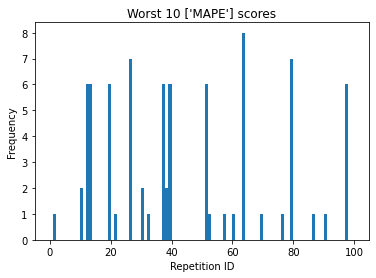

In [8]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([0., 0., 0., 2., 2., 1., 0., 6., 1., 0., 0., 0., 0., 0., 0., 4., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 3., 0., 2., 1.,
        0., 0., 1., 4., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 4.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 4., 4., 0., 1., 4., 0., 1., 5.,
        0., 0., 0., 0., 0., 1., 0., 3., 0., 3., 0., 1., 0., 5., 3.]),
 array([ 7, 84, 98, 78, 77, 67, 15, 54, 81, 47]),
 array([6., 5., 5., 4., 4., 4., 4., 4., 4., 3.]))

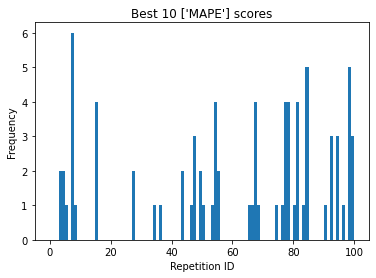

In [9]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Traffic nips

In [10]:
experiment_path = "/datadrive/experiments/deep_ar/traffic_nips/1A"
exp = load_data(experiment_path)

len(exp)

100

In [11]:
report_experiment_results(exp, metric)

MAPE SCORES
	All seeds:
		Mean: 0.17667636226792782
		Std: 0.03502632377079464
		Variance: 0.1871532093521098

	Worst seeds:
		Mean: 0.2605312466621399
		Std: 0.04733823984861374
		Variance: 0.21757352352142334

	Best seeds:
		Mean: 0.14867272973060608
		Std: 0.000754245207644999
		Variance: 0.027463525533676147




In [12]:
exp_array = calculate_timeseries_means(exp, metric, 963)
exp_array.shape

(100, 963, 1)

(array([  1.,  38.,   2.,  21., 963.,   1., 150.,   0.,   1.,   2.,   3.,
          1.,   0.,   0.,   4.,   3.,   1., 253., 165.,   1.,   2., 284.,
          1., 385.,   5.,   1.,   0.,   0., 929.,  12.,   0.,   0.,   0.,
          1.,   0.,   1.,   2.,   0.,   6.,  70.,   0.,   0., 410.,   2.,
          0.,   4., 696., 846.,   0.,   3.,   2.,  11.,   0.,   7.,   5.,
          6.,   0.,   0.,   0.,  16., 903.,   2.,   0.,   0.,   0.,  14.,
         66.,   6., 884.,   2.,  19.,   1.,   0.,   0., 799.,   1.,   0.,
         10.,   2.,  10.,   0.,   2.,   0., 827.,   0.,   0.,   1.,   0.,
          1.,  51.,   2.,   5.,   8.,   3.,   1.,   1., 663.,   0.,  28.,
          1.]),
 array([ 4, 28, 60, 68, 47, 83, 74, 46, 96, 42]),
 array([963., 929., 903., 884., 846., 827., 799., 696., 663., 410.]))

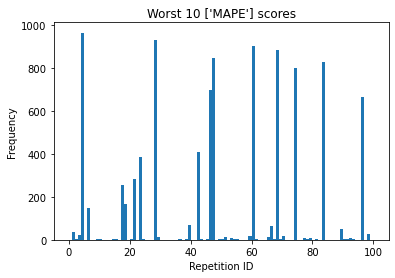

In [13]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([  8.,   0., 112.,   2.,   0.,  60.,   3.,   8.,  79., 173.,  21.,
         29., 231.,  27.,   2.,  38.,  28.,  19.,  20.,  25., 267.,   6.,
         21.,   0.,   1.,   5.,  75.,  14.,   0.,  27.,  15.,  87.,  69.,
        251., 123., 268.,  56.,  33., 294.,   7., 123., 357.,   0.,  92.,
         87.,  28.,   0.,   0., 125.,   2.,  40.,   6., 109.,  14.,  72.,
         26., 108., 267., 390.,   3.,   0.,  16., 288., 329., 184.,   5.,
        111.,  72.,   0., 215.,   8.,  82., 352., 199.,   0.,  70., 410.,
         39., 360.,  35., 318.,   8., 147.,   0., 354., 183.,  87., 150.,
         30.,  54., 182.,  33.,  11., 473., 218.,  58.,   6., 110.,   3.,
         77.]),
 array([93, 76, 58, 78, 41, 84, 72, 63, 80, 38]),
 array([473., 410., 390., 360., 357., 354., 352., 329., 318., 294.]))

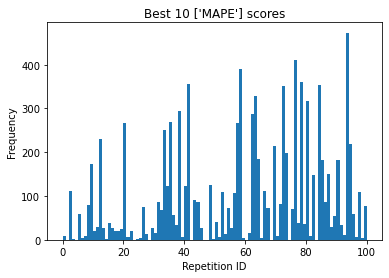

In [14]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Solar nips

In [15]:
experiment_path = "/datadrive/experiments/deep_ar/solar_nips/1B"
exp = load_data(experiment_path)

len(exp)

100

In [16]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 982.2769590945304
		Std: 49.972792660190855
		Variance: 7.069143700632408

	Worst seeds:
		Mean: 1082.2762451171875
		Std: 30.08574867248535
		Variance: 5.485047817230225

	Best seeds:
		Mean: 904.1014404296875
		Std: 15.871689796447754
		Variance: 3.983928918838501


MASE SCORES
	All seeds:
		Mean: 1.1380812197891936
		Std: 0.030425221843553743
		Variance: 0.17442827134256

	Worst seeds:
		Mean: 1.1953017711639404
		Std: 0.020664528012275696
		Variance: 0.1437516212463379

	Best seeds:
		Mean: 1.0892469882965088
		Std: 0.013574393466114998
		Variance: 0.11650919914245605


MAPE SCORES
	All seeds:
		Mean: 1.100589191550335
		Std: 0.11658829035042924
		Variance: 0.3414502750773958

	Worst seeds:
		Mean: 1.2931084632873535
		Std: 0.04499531909823418
		Variance: 0.21212099492549896

	Best seeds:
		Mean: 0.8935206532478333
		Std: 0.03432496264576912
		Variance: 0.18526996672153473




In [17]:
exp_array = calculate_timeseries_means(exp, metric, 137)
exp_array.shape

(100, 137, 1)

(array([ 1., 39., 10., 26.,  0.,  2., 10., 13.,  5.,  4., 19.,  7.,  9.,
        13.,  1., 26., 43., 61.,  7.,  3., 45., 17.,  6., 18.,  6., 28.,
         3.,  3., 10., 19., 14.,  0., 17.,  1., 33.,  1., 13., 13., 18.,
        28., 24., 12.,  4., 17.,  5.,  5.,  7., 37.,  1., 13.,  6.,  0.,
         4., 19., 25.,  0., 33., 16., 21., 24.,  9.,  7., 10.,  4., 17.,
        14., 17., 37., 12.,  9.,  1.,  9.,  3.,  1.,  4., 54.,  9.,  2.,
        23.,  9., 17., 14.,  8.,  8.,  1.,  0., 16.,  6.,  8.,  2.,  1.,
        13., 12., 16.,  3., 51., 22., 16., 26., 14.]),
 array([17, 75, 95, 20, 16,  1, 47, 67, 56, 34]),
 array([61., 54., 51., 45., 43., 39., 37., 37., 33., 33.]))

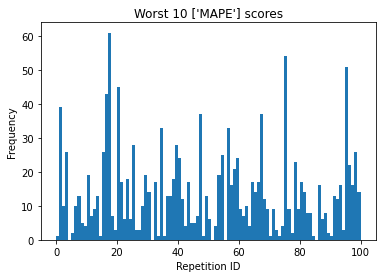

In [18]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([ 5.,  3., 22., 10., 14., 12., 21.,  6., 10., 16., 35.,  7., 21.,
        18., 18.,  1.,  7., 13.,  1.,  0., 18., 18., 30., 27.,  2., 14.,
        15., 38., 22., 20., 27., 16.,  6.,  6., 15.,  7., 22.,  5.,  9.,
        19., 44.,  8.,  1.,  2.,  0.,  7., 17.,  0.,  4., 42., 16., 11.,
         3., 18.,  2.,  4.,  4.,  0., 19., 11.,  1., 16.,  0.,  6.,  4.,
         0., 14., 58., 22., 15.,  1., 41.,  5.,  3.,  0.,  0., 21., 25.,
        30.,  1.,  7., 23., 23.,  3., 30.,  2.,  6.,  4.,  5.,  3., 11.,
        47., 21., 24., 30.,  6., 15., 30.,  2., 26.]),
 array([67, 91, 40, 49, 71, 27, 10, 84, 97, 22]),
 array([58., 47., 44., 42., 41., 38., 35., 30., 30., 30.]))

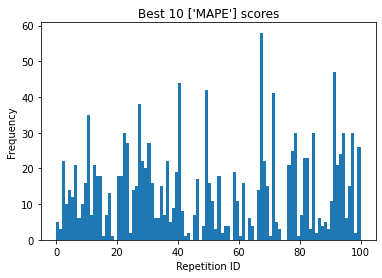

In [19]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]

### Electricity

In [20]:
experiment_path = "/datadrive/experiments/deep_ar/electricity/5A"
exp = load_data(experiment_path)

len(exp)

100

In [21]:
report_experiment_results(exp)

MSE SCORES
	All seeds:
		Mean: 6066396.377494228
		Std: 2672151.353752628
		Variance: 1634.6716348406576

	Worst seeds:
		Mean: 11624255.0
		Std: 573297.1875
		Variance: 757.1639404296875

	Best seeds:
		Mean: 2675973.5
		Std: 285050.8125
		Variance: 533.9014892578125


MASE SCORES
	All seeds:
		Mean: 0.9991174958197203
		Std: 0.3336668107095881
		Variance: 0.5776389968739889

	Worst seeds:
		Mean: 1.759585976600647
		Std: 0.47817906737327576
		Variance: 0.691504955291748

	Best seeds:
		Mean: 0.7513848543167114
		Std: 0.006610790733247995
		Variance: 0.08130677044391632


MAPE SCORES
	All seeds:
		Mean: 0.11780744523881763
		Std: 0.025979360828731958
		Variance: 0.16118114290676797

	Worst seeds:
		Mean: 0.178169384598732
		Std: 0.03976725786924362
		Variance: 0.19941729307174683

	Best seeds:
		Mean: 0.09755636751651764
		Std: 0.001755031757056713
		Variance: 0.04189309850335121




In [22]:
exp_array = calculate_timeseries_means(exp, metric, 321)
exp_array.shape

(100, 321, 1)

(array([  0.,   3.,   0.,   9.,   3.,  34.,  11.,   1.,   1.,   6.,  22.,
        199.,   4.,  21.,   0.,  82.,   6., 229.,  30.,   2.,   1.,   0.,
          1.,   0.,   2.,   0.,   8.,   3.,   1.,   3.,   1.,  53.,   1.,
          2.,   8.,   8.,   4.,   0.,  18.,   0.,  30.,   1.,   2., 205.,
          0.,   1.,   1.,   2., 279.,   0.,   0.,   2.,   1.,   7.,   8.,
          1.,  45.,   0.,  15.,   0.,   6.,   0.,   1.,   2., 217.,   4.,
          1.,   8., 122.,   2.,   3.,   8.,   2.,   0.,  11., 306.,   2.,
          0.,   1.,  23.,   6.,   5.,   1.,   0., 152.,   0.,   0.,   0.,
        170.,   1., 250.,   0.,   0., 186.,   5.,   7.,   0., 307.,   7.,
         17.]),
 array([97, 75, 48, 90, 17, 64, 43, 11, 93, 88]),
 array([307., 306., 279., 250., 229., 217., 205., 199., 186., 170.]))

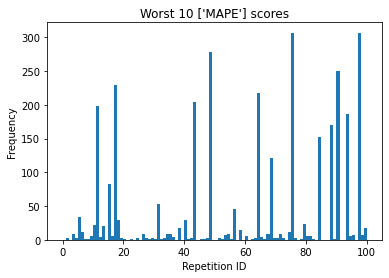

In [23]:
indexes_worst10, worst10 = np.unique(np.argsort(exp_array, axis=0)[-n:], return_counts=True)
worst_10_count = count_repetitions_among_top_n(indexes_worst10, worst10, exp_array.shape[0])
plt.title(f"Worst {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=worst_10_count)

worst_10_count, np.argsort(worst_10_count)[-10:][::-1], worst_10_count[np.argsort(worst_10_count)[-10:][::-1]]

(array([ 11.,  45.,   7.,  47.,  49.,  11.,  16.,  99., 116.,  10.,   6.,
          4.,   8.,   6.,  11.,   6.,  11.,   3.,   9.,   8.,   9.,  41.,
         31.,  32.,   6.,  59.,  29.,  39.,  39.,  33., 146.,  11., 125.,
          6.,   9.,   1.,  65., 139.,  16.,  16.,   2.,  75.,  51.,   2.,
         65.,  27.,   9.,  66.,   1.,   4.,  25.,  13.,  77.,  18.,   7.,
         17.,   5.,  51.,  24.,  40.,  32., 110.,  75.,  21.,   3.,  31.,
          5.,  11.,   5.,  13.,   8.,   6.,  58.,  27.,  15.,   0.,   8.,
         70.,  22.,   5.,   8.,  28.,  96.,  75.,   4.,  39., 136.,  60.,
          4.,  34.,   2.,  37.,  66.,   5.,  15.,   6., 134.,   5.,   9.,
          8.]),
 array([30, 37, 86, 96, 32,  8, 61,  7, 82, 52]),
 array([146., 139., 136., 134., 125., 116., 110.,  99.,  96.,  77.]))

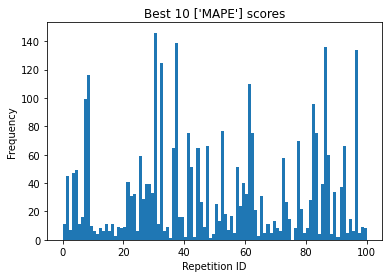

In [24]:
indexes_best10, best10 = np.unique(np.argsort(exp_array, axis=0)[:n], return_counts=True)
best_10_count = count_repetitions_among_top_n(indexes_best10, best10, exp_array.shape[0])
plt.title(f"Best {n} {metric} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

plt.hist([i for i in range(exp_array.shape[0])], bins=exp_array.shape[0], range=(0, exp_array.shape[0]), weights=best_10_count)

best_10_count, np.argsort(best_10_count)[-10:][::-1], best_10_count[np.argsort(best_10_count)[-10:][::-1]]